# Performance Comparison: `dual_autodiff` vs `dual_autodiff_x`
This notebook benchmarks and compares the performance of `dual_autodiff` (non-Cythonized) and `dual_autodiff_x` (Cythonized) packages.

## Metrics
- **Execution Time**: Time taken for key operations.
- **Memory Usage**: Memory footprint during operations.

## Methodology
- Use a suite of Dual class operations for consistent testing.
- Compare results using Python's `timeit` and `memory-profiler` libraries.
- Python's `prun` library was used for pure-Python packages, to obtain the break down of execution time by called methods.

In [2]:
# Imports for performance and memory profiling
import math
from memory_profiler import memory_usage
from timeit import timeit

# Import Dual class from both packages
from dual_autodiff.dual import Dual as DualRegular
from dual_autodiff_x.dual_autodiff_x.dual import Dual as DualCython # Needs to be pre-compiled


## Define Test Suite
Prepare operations.

In [16]:
def run_operations(Dual, repetitions=1000):
    for _ in range(repetitions):
        d1 = Dual(2, 3)
        d2 = Dual(4, 5)
        # Basic arithmetic
        d1 + d2
        d1 - d2
        d1 * d2
        d1 / d2
        # Trigonometric functions
        d3 = Dual(math.pi / 4, 1)
        d3.sin()
        d3.cos()
        d3.tan()
    
        # Logarithmic and exponential
        d4 = Dual(2, 1)
        d4.log()
        d4.exp()


## Measure Execution Time
Using Python's `timeit` module to measure performance.

In [4]:
# Regular package
time_regular = timeit(lambda: run_operations(DualRegular, repetitions=10000), number=10)
print(f"Execution time (dual_autodiff): {time_regular:.4f} seconds")

# Cythonized package
time_cython = timeit(lambda: run_operations(DualCython, repetitions=10000), number=10)
print(f"Execution time (dual_autodiff_x): {time_cython:.4f} seconds")

Execution time (dual_autodiff): 0.4902 seconds
Execution time (dual_autodiff_x): 0.1505 seconds


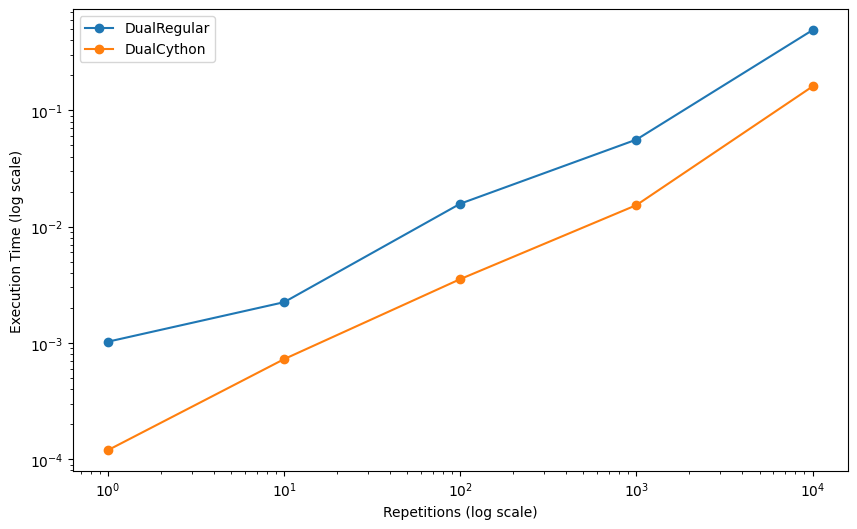

In [17]:
import matplotlib.pyplot as plt
repetitions_list = [1, 10, 100, 1000, 10000]
regular_times = []
cython_times = []

for repetitions in repetitions_list:
    time_regular = timeit(lambda: run_operations(DualRegular, repetitions), number=10)
    time_cython = timeit(lambda: run_operations(DualCython, repetitions), number=10)
    regular_times.append(time_regular)
    cython_times.append(time_cython)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(repetitions_list, regular_times, label="DualRegular", marker='o')
plt.plot(repetitions_list, cython_times, label="DualCython", marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Repetitions (log scale)")
plt.ylabel("Execution Time (log scale)")
plt.legend()
plt.savefig("comparison.png")

## Measure Memory Usage
Using `memory_profiler` to measure memory consumption.

In [10]:
def memory_test(Dual):
    def wrapper():
        run_operations(Dual)
    return memory_usage(wrapper, interval=0.1, timeout=1)

# Measure memory usage for regular package
memory_regular = memory_test(DualRegular)
print(f"Peak memory usage (dual_autodiff): {max(memory_regular):.2f} MB")

# Measure memory usage for Cythonized package
memory_cython = memory_test(DualCython)
print(f"Peak memory usage (dual_autodiff_x): {max(memory_cython):.2f} MB")

Peak memory usage (dual_autodiff): 130.82 MB
Peak memory usage (dual_autodiff_x): 130.82 MB


In [11]:
# Profiling the regular package
print("Profiling DualRegular (10000 repetitions):")
%prun run_operations(DualRegular, repetitions=10000)

Profiling DualRegular (10000 repetitions):
 

         310004 function calls in 0.121 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.036    0.036    0.121    0.121 2278539239.py:1(run_operations)
   130000    0.019    0.000    0.019    0.000 dual.py:6(__init__)
    10000    0.010    0.000    0.014    0.000 dual.py:50(tan)
    10000    0.007    0.000    0.010    0.000 dual.py:36(sin)
    10000    0.007    0.000    0.010    0.000 dual.py:68(exp)
    10000    0.007    0.000    0.009    0.000 dual.py:28(__truediv__)
    10000    0.007    0.000    0.010    0.000 dual.py:43(cos)
    10000    0.006    0.000    0.009    0.000 dual.py:59(log)
    10000    0.004    0.000    0.006    0.000 dual.py:21(__mul__)
    10000    0.004    0.000    0.005    0.000 dual.py:17(__sub__)
    10000    0.004    0.000    0.005    0.000 dual.py:13(__add__)
    40000    0.003    0.000    0.003    0.000 {built-in method math.cos}
    20000    0.002    0.000    0.002    0.000 {built-i

## Compare Results
Summarize the performance comparison between the two implementations.

In [25]:
print("Performance Comparison Summary:")
print(f"Execution Time - dual_autodiff: {time_regular:.4f}s")
print(f"Execution Time - dual_autodiff_x: {time_cython:.4f}s")
print(f"Memory Usage - dual_autodiff: {max(memory_regular):.2f} MB")
print(f"Memory Usage - dual_autodiff_x: {max(memory_cython):.2f} MB")

Performance Comparison Summary:
Execution Time - dual_autodiff: 4.6319s
Execution Time - dual_autodiff_x: 1.5272s
Memory Usage - dual_autodiff: 71.49 MB
Memory Usage - dual_autodiff_x: 71.58 MB
